In [2]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd
from datetime import datetime

# Import modularization 
import os
import sys 
sys.path.append(os.path.abspath('../scripts'))
import data_preprocessing as dp
import descriptive_stats as ss
import utils as ut 

In [3]:
train_file = ('../rossmann-store-sales/train.csv')
test_file = ('../rossmann-store-sales/test.csv')
store_file = ('../rossmann-store-sales/store.csv')

In [4]:
df_train, df_test, df_store = dp.load_data(train_file, test_file, store_file)

c:\Users\Hp\Desktop\Kifiya\Week4\RossmannStoreSales\scripts\data_preprocessing.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_file)


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         ----

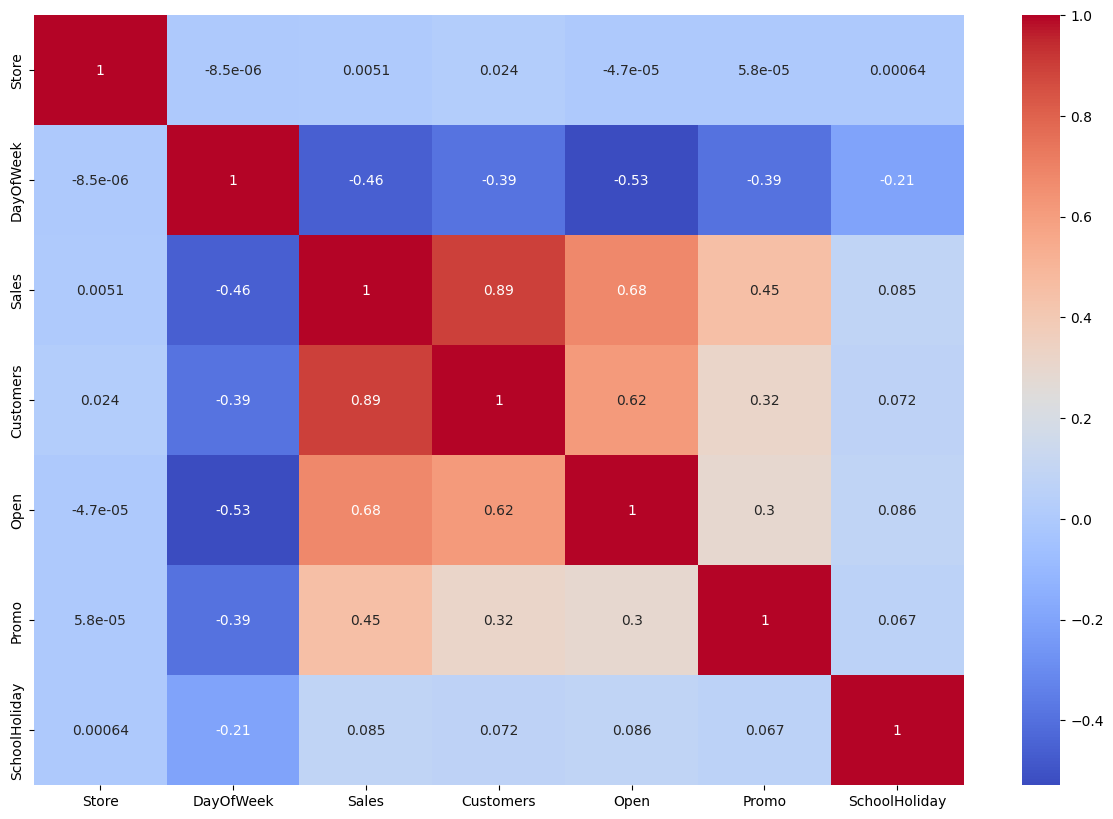

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [5]:
ss.perform_eda(df_train)

   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0
Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int6

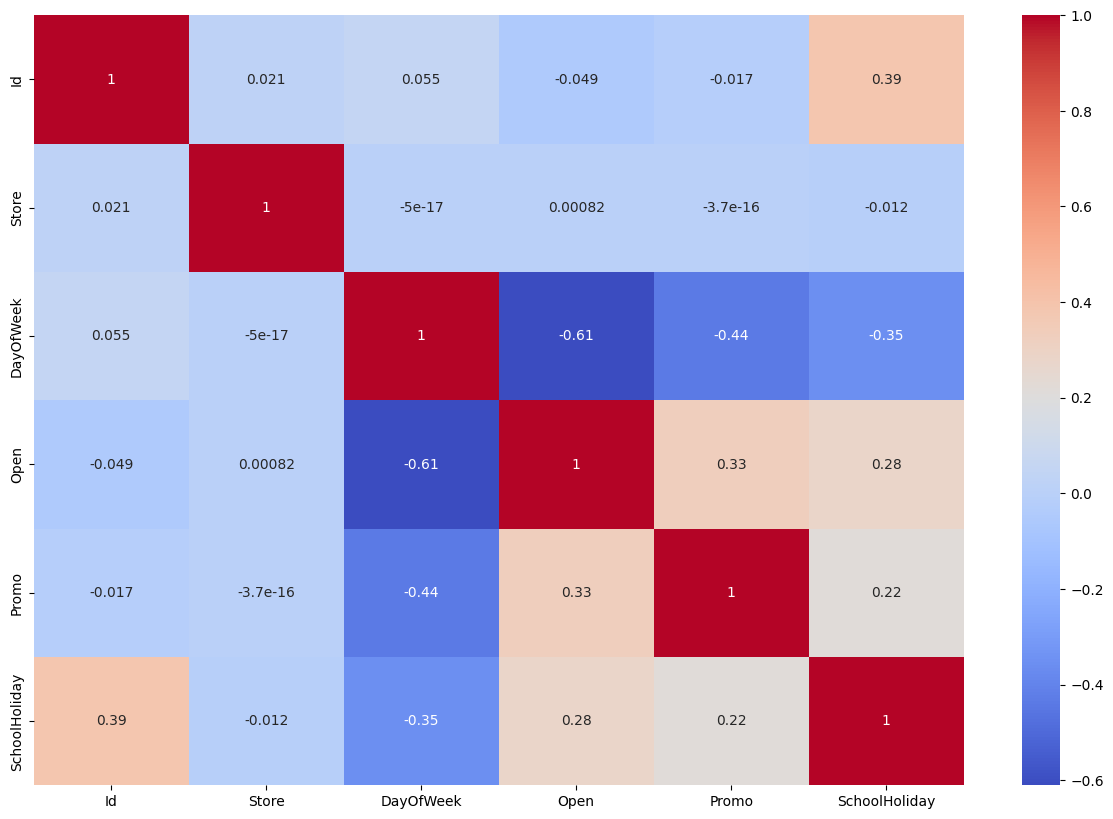

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [6]:
ss.perform_eda(df_test)

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

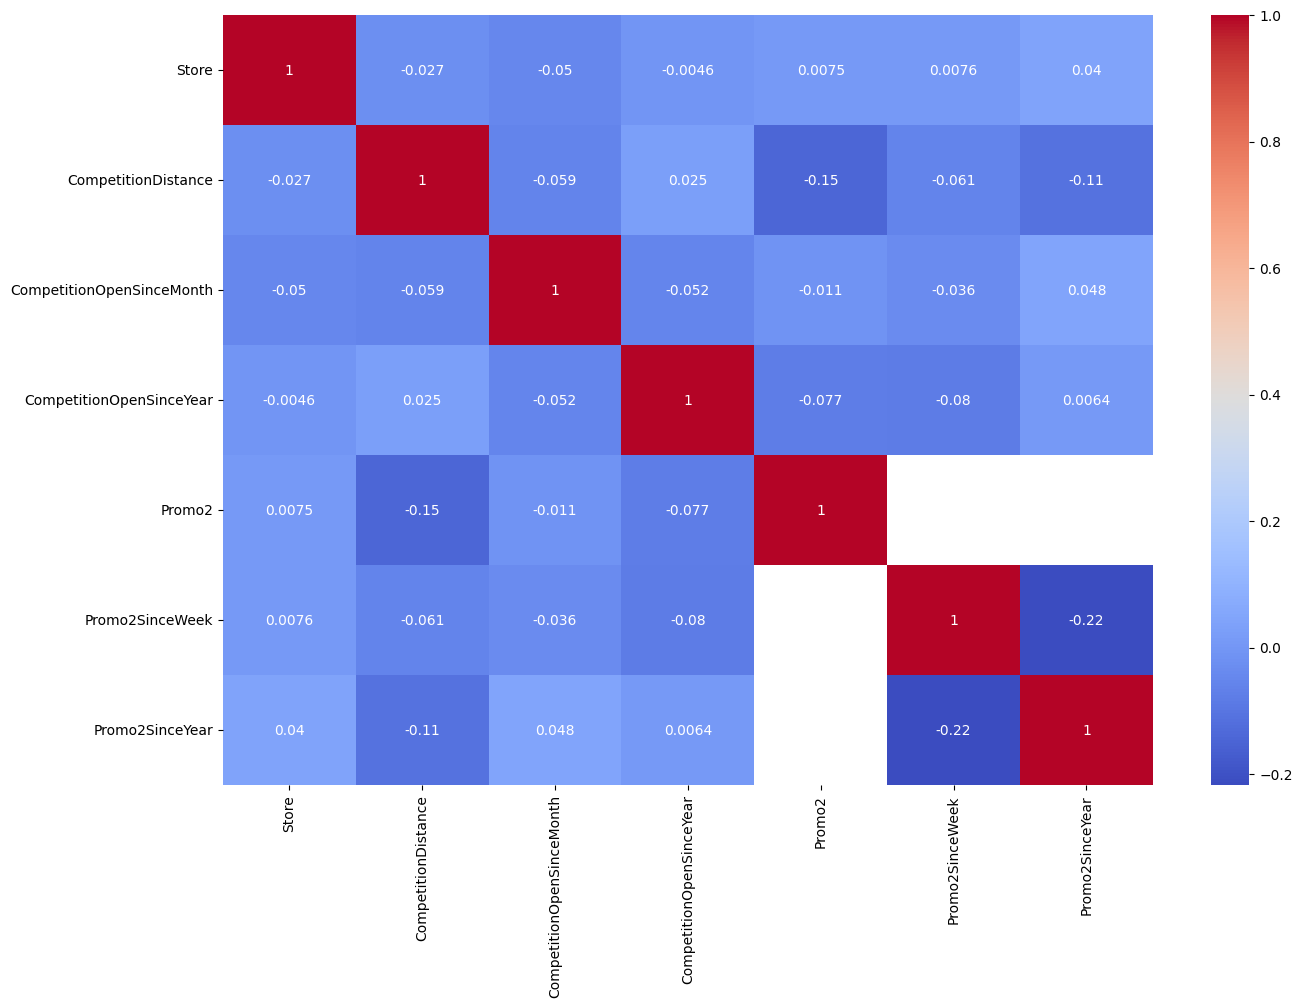

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [7]:
ss.perform_eda(df_store)

### Data Cleaning

#### Test Data

In [8]:
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [9]:
missing_values = df_test[df_test.isna().any(axis=1)]
print(missing_values)

          Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
479      480    622          4  2015-09-17   NaN      1            0   
1335    1336    622          3  2015-09-16   NaN      1            0   
2191    2192    622          2  2015-09-15   NaN      1            0   
3047    3048    622          1  2015-09-14   NaN      1            0   
4759    4760    622          6  2015-09-12   NaN      0            0   
5615    5616    622          5  2015-09-11   NaN      0            0   
6471    6472    622          4  2015-09-10   NaN      0            0   
7327    7328    622          3  2015-09-09   NaN      0            0   
8183    8184    622          2  2015-09-08   NaN      0            0   
9039    9040    622          1  2015-09-07   NaN      0            0   
10751  10752    622          6  2015-09-05   NaN      0            0   

       SchoolHoliday  
479                0  
1335               0  
2191               0  
3047               0  
4759               0

#### Handling Missing Values in the Open Column
Based on the dataset description, some stores were temporarily closed for refurbishment. Specifically, Store 622 was closed from 2015-09-05 to 2015-09-17. During this period, the `Open` column has missing values (NaN). I will fill these missing values with 0, indicating that the store was closed.

##### Analysis
 - Store 622 was closed for refurbishment from 2015-09-05 to 2015-09-17.
 - During this period, the Open column is NaN.
 - Even though some rows have active promotions (Promo column is 1), the store was actually closed.
 - The Date column shows that the missing values are consecutive from 2015-09-05 to 2015-09-17.

In [10]:
# Fill missing values in 'Open' column with 0 for Store 622 during the refurbishment period
df_test.loc[(df_test['Store'] == 622) & (df_test['Date'] >= '2015-09-05') & (df_test['Date'] <= '2015-09-17'), 'Open'] = 0

In [11]:
# Verify the changes
missing_open = df_test[df_test['Open'].isna()]
print(missing_open)  

Empty DataFrame
Columns: [Id, Store, DayOfWeek, Date, Open, Promo, StateHoliday, SchoolHoliday]
Index: []


#### Store Data

In [12]:
ut.check_missing_values(df_store)

,column_name,missing_count
0,CompetitionDistance,3
1,CompetitionOpenSinceMonth,354
2,CompetitionOpenSinceYear,354
3,Promo2SinceWeek,544
4,Promo2SinceYear,544
5,PromoInterval,544


In [13]:
# Using a dictionary to specify the columns and values
df_store.fillna({"CompetitionDistance": 0, "CompetitionOpenSinceMonth": 0, 
                 "CompetitionOpenSinceYear": 0, "Promo2SinceWeek": 0,
                 "Promo2SinceYear": 0, "PromoInterval": 0}, inplace=True)

In [14]:
# checking for missing values
missing_store = ut.check_missing_values(df_store)
print(missing_store)

Empty DataFrame
Columns: [column_name, missing_count]
Index: []


Changing date format to datetime, creating data range and formating categorical variable

In [15]:
# Ensure 'Promo' is treated as a categorical variable
df_train['Promo'] = df_train['Promo'].astype('category')
df_test['Promo'] = df_test['Promo'].astype('category')

# Verify the conversion
print(df_train['Promo'].dtype)  # Should print 'category'
print(df_test['Promo'].dtype)   # Should print 'category'

# Converting date column to datetime format 
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Creating date ranges 
train_range = pd.date_range(df_train['Date'].min(), df_train['Date'].max(), freq='D')
test_range = pd.date_range(df_test['Date'].min(), df_test['Date'].max(), freq='D')
full_range = pd.date_range(df_train['Date'].min(), df_test['Date'].max(), freq='D')

category
category


In [16]:
df_train = df_train[df_train['Sales'] != 0] 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


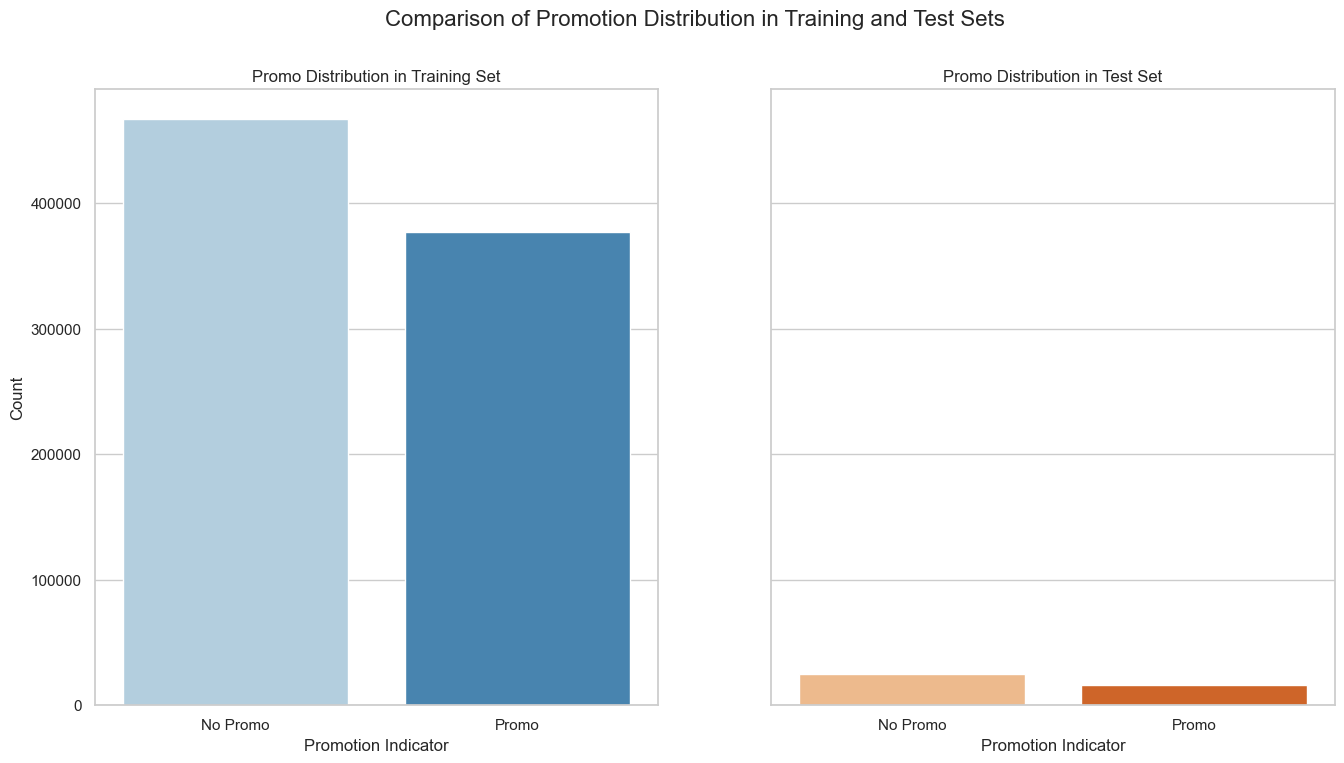

In [17]:
dp.promo_distribution(df_train, df_test)

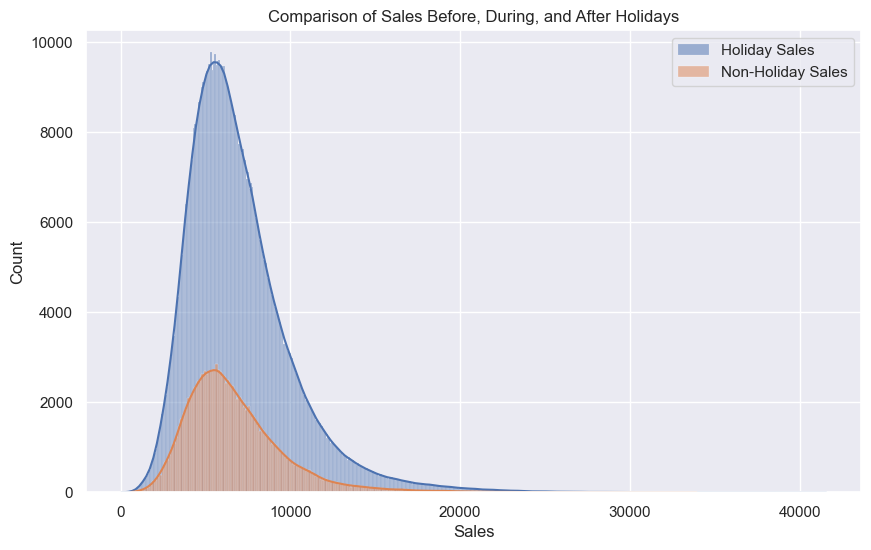

In [18]:
dp.sales_behaviour(df_train)

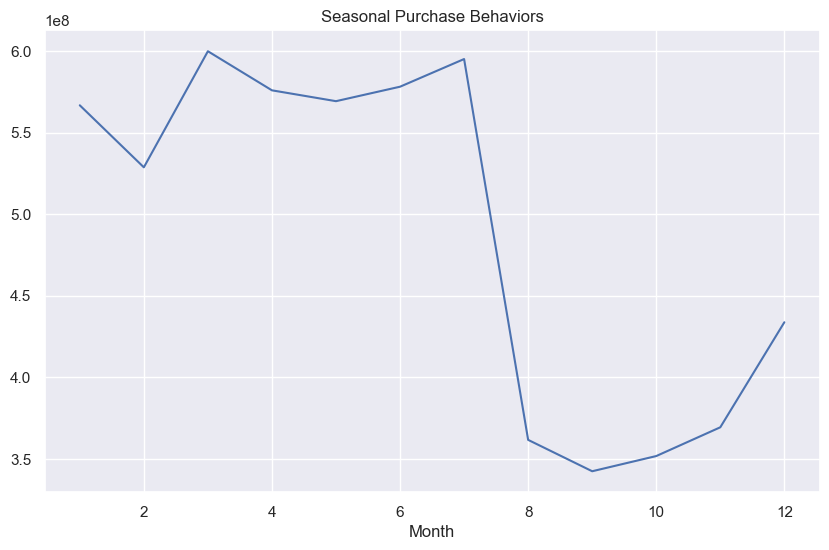

In [19]:
dp.seasonal_purchase(df_train)

INFO:data_preprocessing:Correlation between sales and number of customers: 0.8235517202000183


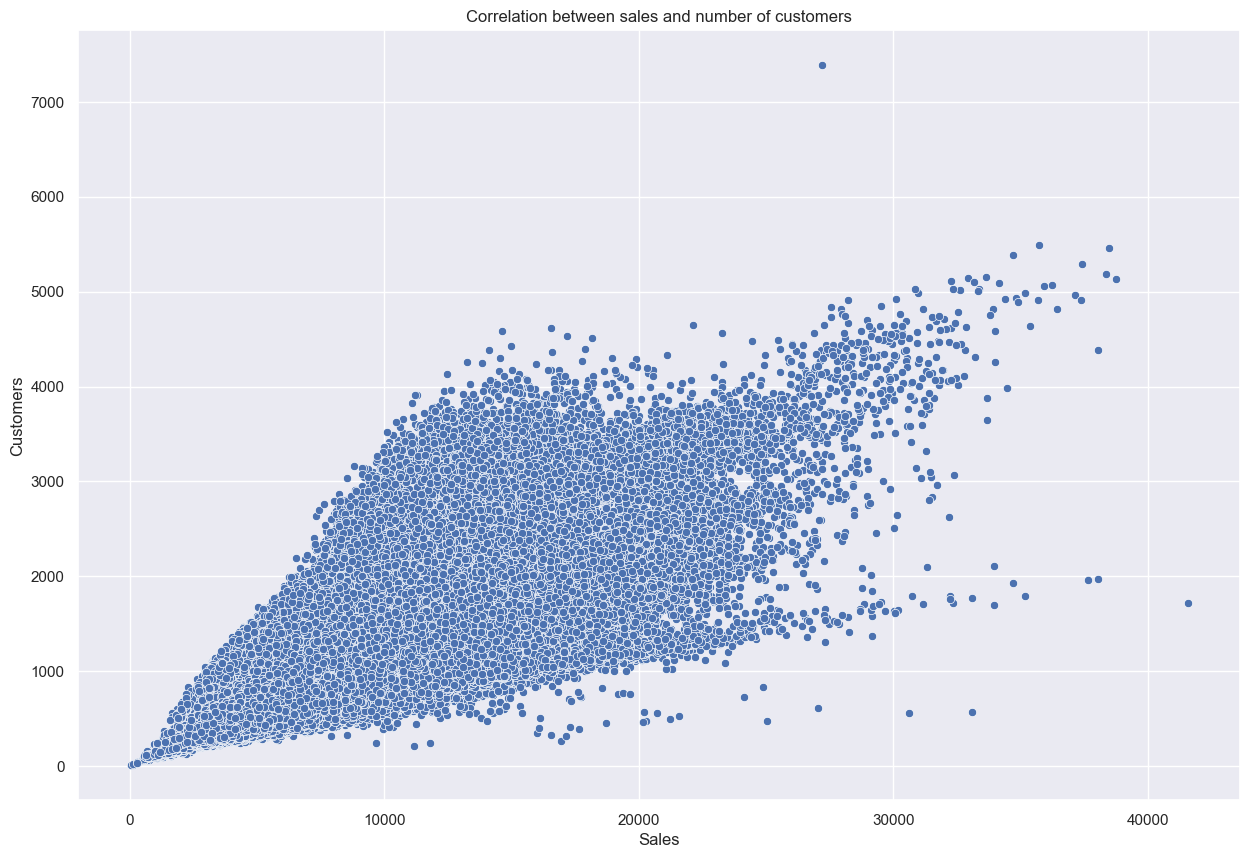

In [20]:
dp.sales_vs_customer(df_train)

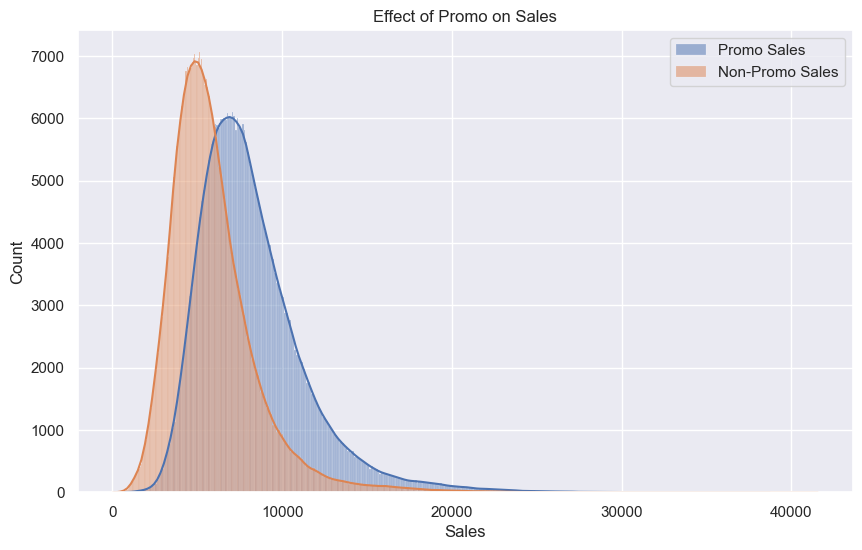

In [21]:
dp.promo_effect_on_sales(df_train)

In [22]:
open = df_train[df_train['Open'] == 0]
open.head

<bound method NDFrame.head of Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, Month, Year]
Index: []>

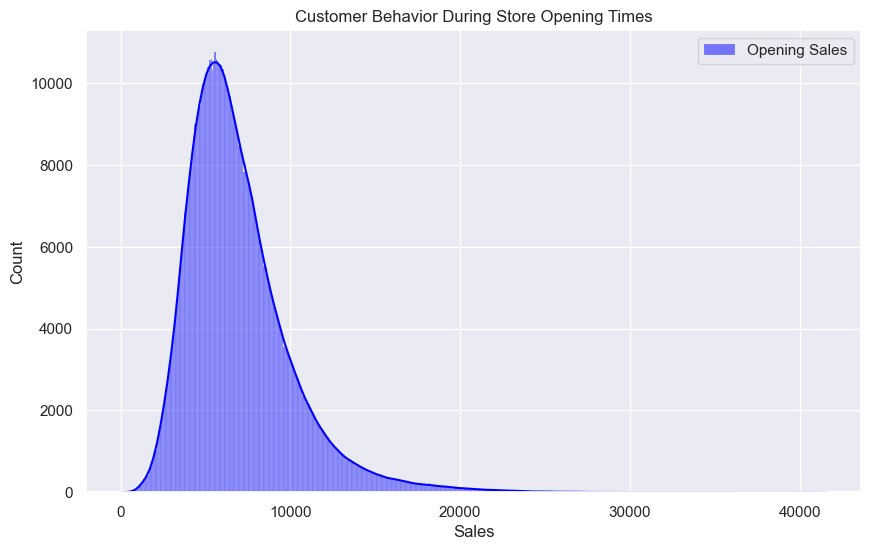

In [23]:
dp.customer_behaviour(df_train)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


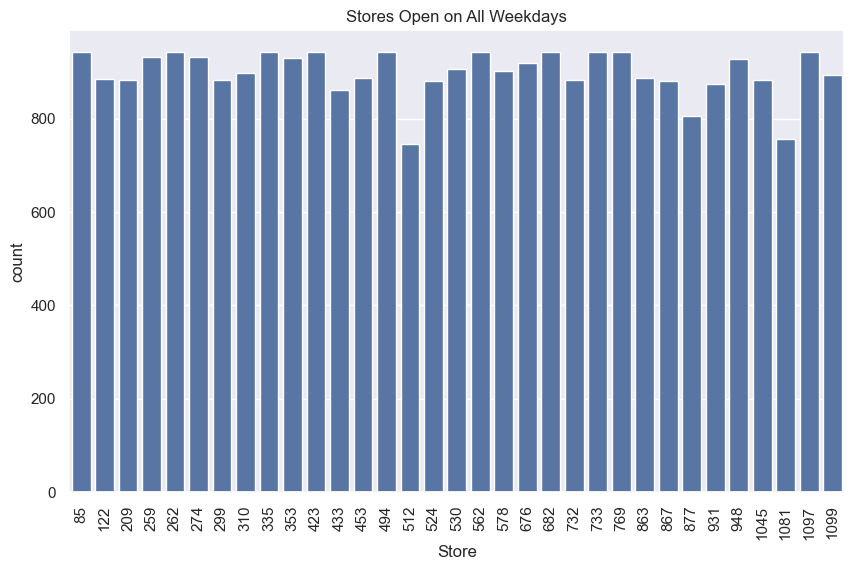

In [24]:
dp.stores_open_all_weekdays(df_train)

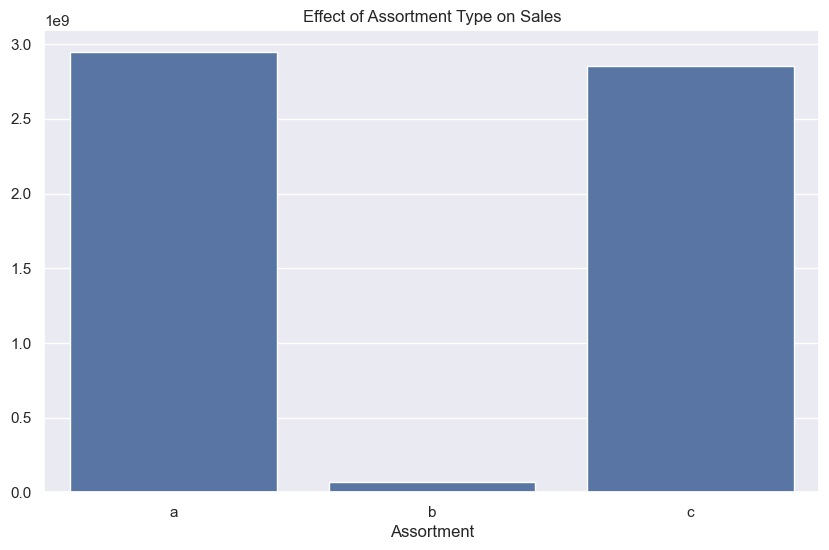

In [25]:
dp.effect_of_assortment_on_sales(df_train, df_store)

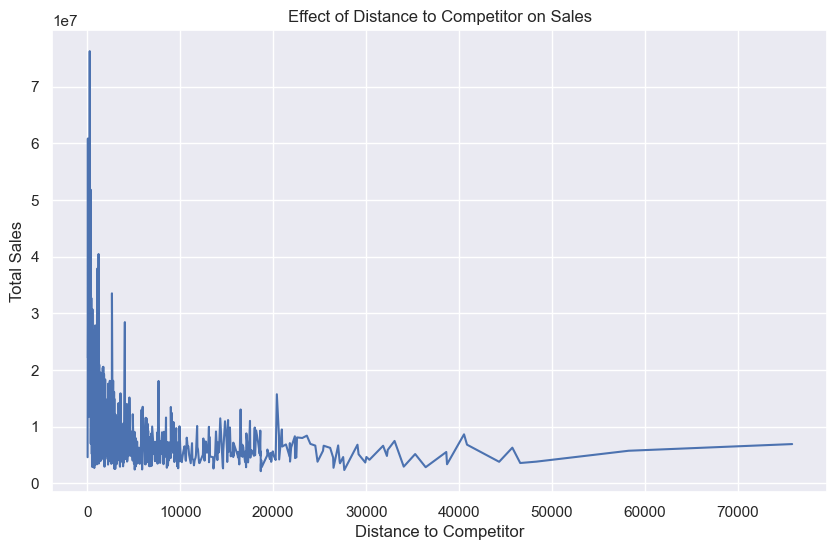

In [26]:
dp.effect_of_competitor_distance_on_sales(df_train, df_store)

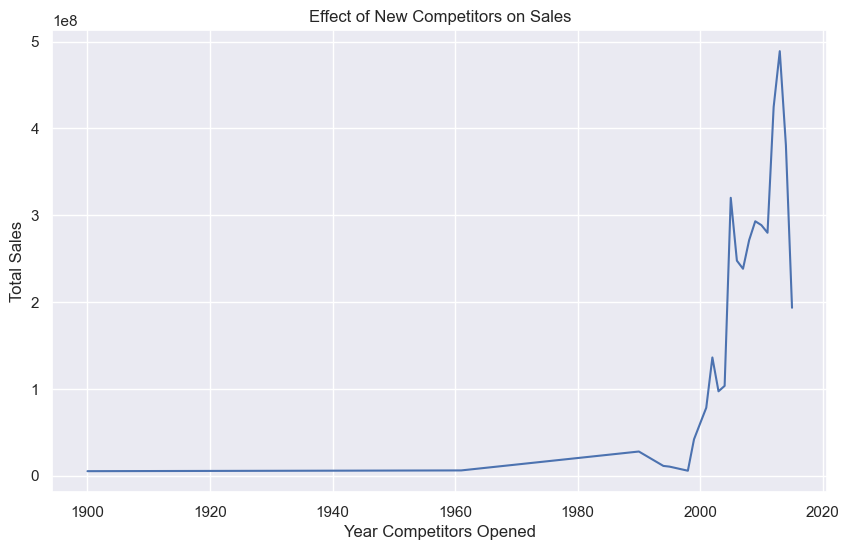

In [27]:
dp.effect_of_new_competitors(df_train, df_store)

In [29]:
df_train.to_csv('../rossmann-store-sales/train.csv', index=False)
df_test.to_csv('../rossmann-store-sales/test.csv', index=False)
df_store.to_csv('../rossmann-store-sales/store.csv', index=False)

In [359]:
import logging 
# Create a logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Create a file handler
handler = logging.FileHandler('logfile.log')
handler.setLevel(logging.INFO)

# Create a logging format
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# Add the handlers to the logger
logger.addHandler(handler)